In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./anime_cleaned.csv')

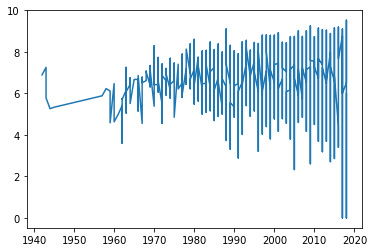

In [31]:
df = df.sort_values(by=['aired_from_year'])
plt.plot(df['aired_from_year'], df['score'])
# df = df.set_index(['aired_from_year'])


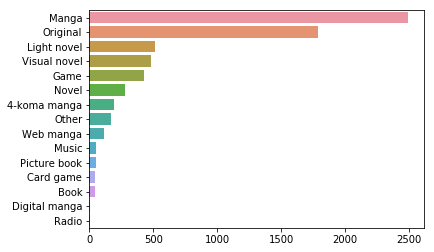

In [32]:
df.sort_values(by=['aired_from_year'])
source = df['source'].value_counts()
fig = plt.figure()
ax = fig.add_subplot(111)

sns.barplot(x=source.values, y=source.index, orient="h")

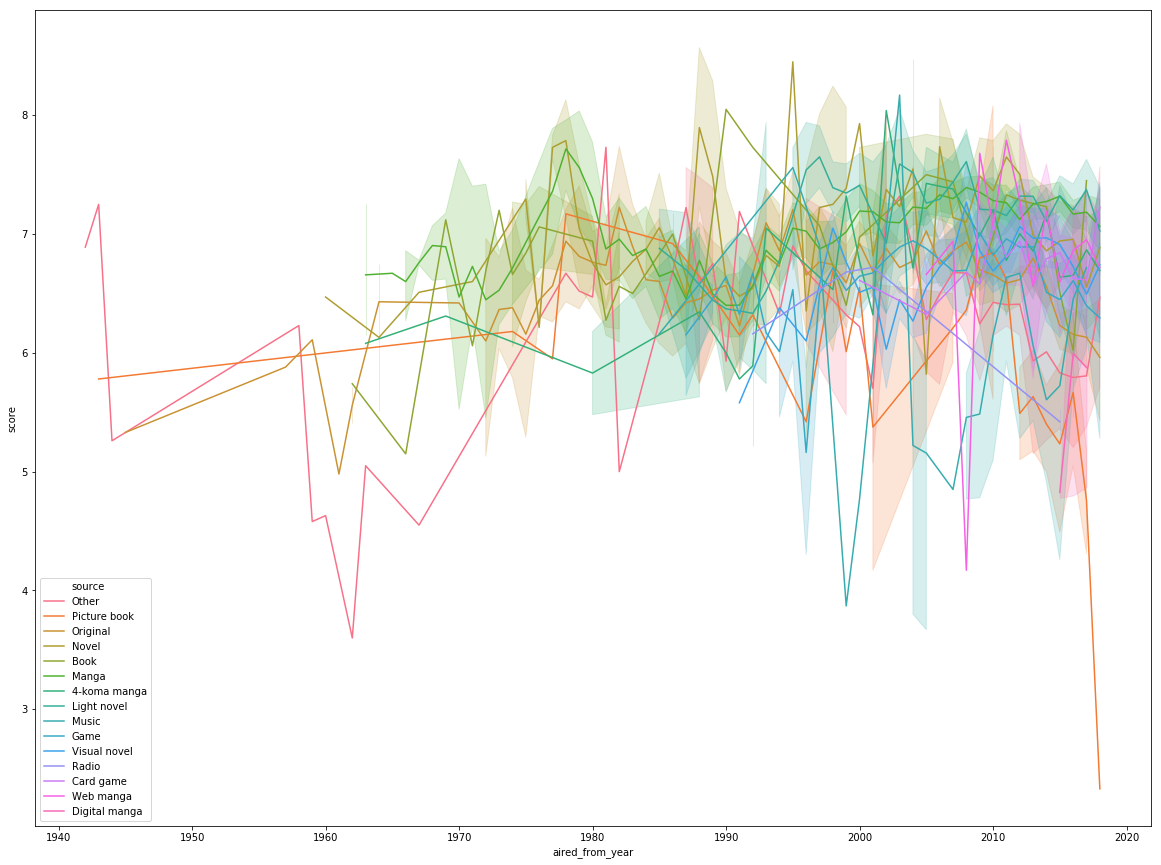

In [33]:
plt.figure(figsize=(20,15))
ax = sns.lineplot(x="aired_from_year", y="score", hue="source", data=df)

In [34]:
df = df.groupby(['aired_from_year']).mean()

In [35]:
df.head()

,anime_id,episodes,airing,score,scored_by,rank,popularity,members,favorites,duration_min
aired_from_year,,,,,,,,,,
1942.0,23969.0,1.0,0.0,6.890,9.0,10114.0,12255.0,134.0,0.0,11.0
1943.0,13980.5,1.0,0.0,6.515,345.0,8978.5,10212.5,666.5,0.5,12.5
1944.0,7523.0,1.0,0.0,5.260,95.0,8749.0,10539.0,287.0,0.0,30.0
1945.0,2765.0,1.0,0.0,5.330,466.0,8635.0,8131.0,1077.0,2.0,74.0
1957.0,6993.0,1.0,0.0,5.880,471.0,7621.0,8503.0,884.0,0.0,13.0
